# FOR Priority

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string as st
print('Imported Successfully')

Imported Successfully


In [2]:
# Reading the data and storing it in the dataframe(from pandas)
df = pd.read_csv('EDI_DATASET.csv')
print('CSV opened and read successfully')

CSV opened and read successfully


## Stages of the Projects
#### 1. Dataset Creation / Data Cleaning
#### 2. EDA(Exploratory Data Analysis) - Basically Visualizing the dataset
#### 3. Text Preprocessing - Tokenisation, Vectorisation
#### 4. Model Building (Naive Bayes Algorithm)
#### 5. Model Evaluation (ACcuracy)
#### 6. Improvements / Comparitive Analysis
#### 7. Deploy in website form

### Stage 1. About Data and Preprocessing the data(understanding the data)

In [3]:
df.sample(5)

,spam(1)/ham(0),"class(type of the emai)(0: finance,1 : operations, 2: advertisement, 3: cust_supp, 4: hr)",body(message),"Overall tone of the mail (0: Happy, 1: Neutral, 2: Enquiry, 3: Complaint)","Priority(0: low, 1: medium, 2: high)"
468,Ham,advertisement,"Hi Team, The creative brief for our next adver...",Enquiry,Medium
221,Ham,advertisement,We need your feedback on the new advertisement...,Enquiry,Medium
96,Ham,hr,The diversity and inclusion workshop is schedu...,Neutral,Medium
160,Ham,finance,Could you provide the budget breakdown for the...,Enquiry,Medium
7,Spam,hr,Earn your degree in 6 months! No exams required.,Happy,Low


In [4]:
df.shape

(814, 5)

In [5]:
# Renaming the columns
df.rename(columns = {'spam(1)/ham(0)':'target', 'class(type of the emai)(0: finance,1 : operations, 2: advertisement, 3: cust_supp, 4: hr)' : 'class', 'body(message)' : 'body', 'Overall tone of the mail (0: Happy, 1: Neutral, 2: Enquiry, 3: Complaint)' : 'tone', 'Priority(0: low, 1: medium, 2: high)' : 'priority'}, inplace=True)
print('Columns Renamed')

Columns Renamed


In [6]:
# drop the unneccesary columns which are not required for prority
df.drop(columns=['target', 'class', 'tone'], inplace=True)
print('Dropped Unneccesary Columns')

Dropped Unneccesary Columns


In [7]:
df.sample(8)

,body,priority
453,"Dear Customer, Your recent return has been pro...",Low
34,Can you provide an update on the status of my ...,High
238,We are sorry to hear about the issue with your...,High
335,"Hi Team, Please find the attached expense repo...",Medium
0,"Dear John, please find attached the quarterly ...",High
713,"Dear Customer, Thank you for reaching out. Our...",High
700,Alert: Your account has been temporarily suspe...,High
546,Urgent: Your account has been compromised. Cli...,High


In [8]:
# Importing the library
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
print('Imported the Label encoder from Sci-kit learn Library')

Imported the Label encoder from Sci-kit learn Library


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      814 non-null    object
 1   priority  814 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB


#### Encoding the columns of the dataset

In [10]:
df['priority'] = encoder.fit_transform(df['priority'])
print('Encoded the priority column of the dataset')

Encoded the priority column of the dataset


In [11]:
df.sample(20)

,body,priority
513,"Dear Team, We have finalized the marketing mat...",2
590,"Dear Customer, Thank you for your inquiry. We'...",2
444,"Hi Team, The final cut of the holiday campaign...",2
137,Thank you for your patience. We are currently ...,1
193,I am facing an issue with the software. It kee...,0
90,We are pleased to announce the promotion of Ja...,2
390,"Hi Team, The results of our recent social medi...",2
303,"Dear Customer, Don’t miss out on our exclusive...",1
631,"Team, Please be informed that the cafeteria wi...",2
37,There is a planned power outage in the buildin...,2


In [12]:
# check for missing values
df.isnull().sum()

body        0
priority    0
dtype: int64

In [13]:
# check for duplicates
df.duplicated().sum()

185

In [14]:
# delete the duplicate entries
df = df.drop_duplicates(keep='first')
print('Removed the Duplicates but kept the first ones')

Removed the Duplicates but kept the first ones


In [15]:
# check for duplicates again
df.duplicated().sum()

0

### Stage 2: EDA (Exploratory Data analysis)

In [16]:
df.sample(8)

,body,priority
515,"Team, Please be advised that the elevator will...",2
389,"Dear Team, The updated procedures for equipmen...",2
186,We are sorry to hear about the issue with your...,0
318,"Dear Customer, Your issue has been resolved. P...",1
458,Immediate Action Required: Your account is ove...,0
672,"Hi Everyone, Just a friendly reminder to revie...",1
103,The equipment upgrade will take place over the...,2
481,Your account has been flagged for suspicious a...,0


In [17]:
# count the different types of the target in the dataset
df['priority'].value_counts()

priority
2    276
0    212
1    141
Name: count, dtype: int64

In [18]:
# 0 = high
# 1 = low
# 2 = medium

<function matplotlib.pyplot.show(close=None, block=None)>

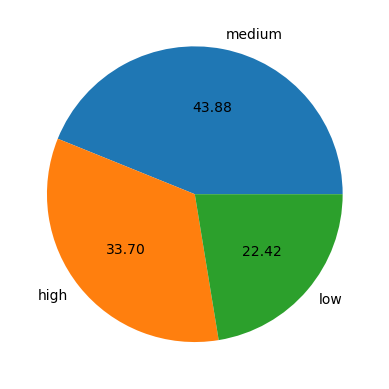

In [19]:
# pie chart of the classes
plt.pie(df['priority'].value_counts(), labels = ['medium', 'high', 'low'], autopct= '%0.2f')
plt.show

##### Data is fairly balanced

### Analysis Using NLTK (Natural Language Toolkit)

In [20]:
#using nltk library for further analysis
nltk.download('punkt')
print("Dependencies downloaded Successfully")

Dependencies downloaded Successfully


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bahad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Now We will add 3 more columns to the dataframe
##### 1. No. of characters of the message
##### 2. No. of words of the message
##### 2. No. of sentences of the message

In [21]:
# counting no. of characters
df['char_no'] = df['body'].apply(len)
print('No. of Character Column added.')

No. of Character Column added.


In [22]:
# counting no of words
df['word_no'] = df['body'].apply(lambda x:len(nltk.word_tokenize(x)))
print('No. of Words Column added.')

No. of Words Column added.


In [23]:
# counting the no of sentences
df['sent_no'] = df['body'].apply(lambda x: len(nltk.sent_tokenize(x)))
print('No. of Sentences Column Added')

No. of Sentences Column Added


In [24]:
df.head()

,body,priority,char_no,word_no,sent_no
0,"Dear John, please find attached the quarterly ...",0,74,13,1
1,Congratulations! You've won a free trip to the...,1,87,19,3
2,"Hi, I am having trouble with my account login....",0,69,16,2
3,Please join us in welcoming our new team membe...,1,77,17,1
4,Urgent: Your bank account has been compromised...,0,80,14,2


In [25]:
# analysis on new 3 columns
df[['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,629.000000,629.000000,629.000000
mean,125.645469,23.435612,2.484897
std,53.985371,9.948805,0.965245
min,37.000000,7.000000,1.000000
25%,84.000000,16.000000,2.000000
50%,120.000000,22.000000,2.000000
75%,152.000000,28.000000,3.000000
max,432.000000,77.000000,7.000000


In [26]:
#analysis of each class of the message, class 0 
df[df['priority'] == 0][['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,212.000000,212.000000,212.000000
mean,115.429245,21.316038,2.311321
std,39.763039,7.392780,0.847222
min,51.000000,9.000000,1.000000
25%,85.000000,16.000000,2.000000
50%,111.500000,20.000000,2.000000
75%,141.000000,26.000000,3.000000
max,294.000000,51.000000,6.000000


In [27]:
#analysis of each class of the message, class 1 
df[df['priority'] == 1][['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,141.000000,141.000000,141.000000
mean,125.695035,24.595745,2.659574
std,65.910214,12.056402,1.094335
min,37.000000,7.000000,1.000000
25%,76.000000,15.000000,2.000000
50%,114.000000,23.000000,3.000000
75%,160.000000,32.000000,3.000000
max,432.000000,77.000000,7.000000


In [28]:
#analysis of each class of the message, class 2 
df[df['priority'] == 2][['char_no', 'word_no', 'sent_no']].describe()

,char_no,word_no,sent_no
count,276.000000,276.000000,276.000000
mean,133.467391,24.471014,2.528986
std,55.577913,10.240520,0.962512
min,49.000000,8.000000,1.000000
25%,86.000000,16.000000,2.000000
50%,132.000000,24.000000,2.000000
75%,162.000000,30.000000,3.000000
max,343.000000,63.000000,6.000000


C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='word_no', ylabel='Count'>

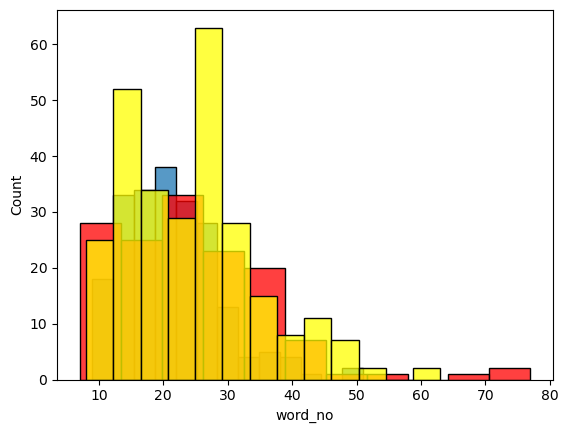

In [29]:
# visual analysis with the help of seaborn library
sns.histplot(df[df['priority'] == 0]['word_no'])
sns.histplot(df[df['priority'] == 1]['word_no'], color='red')
sns.histplot(df[df['priority'] == 2]['word_no'], color='yellow')

C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


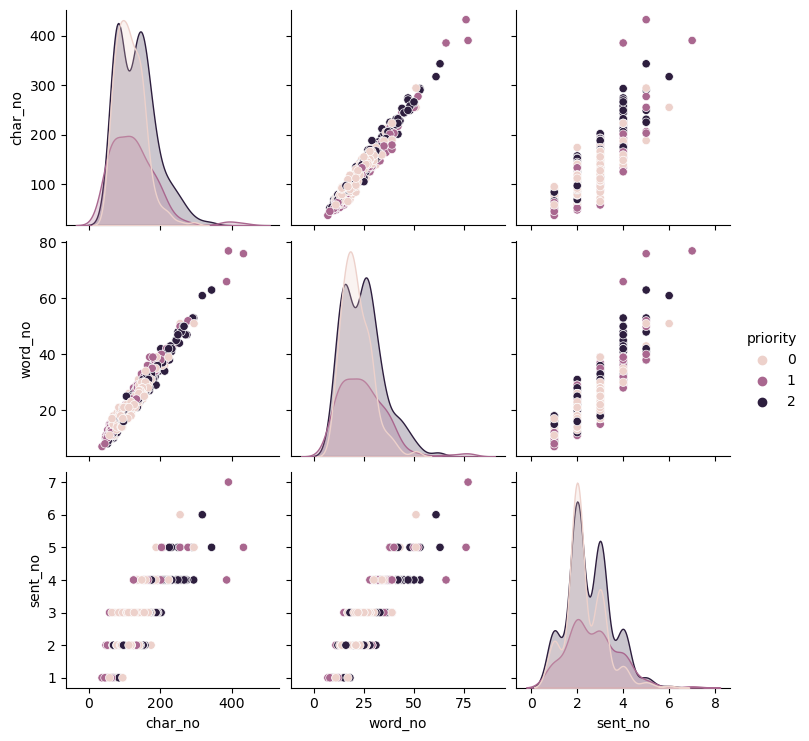

In [30]:
# co-relation of no. of character, no. of words, no. of sentences
sns.pairplot(df, hue='priority')

In [31]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,priority,char_no,word_no,sent_no
priority,1.000000,0.145682,0.134374,0.092255
char_no,0.145682,1.000000,0.980986,0.854806
word_no,0.134374,0.980986,1.000000,0.884662
sent_no,0.092255,0.854806,0.884662,1.000000


<Axes: >

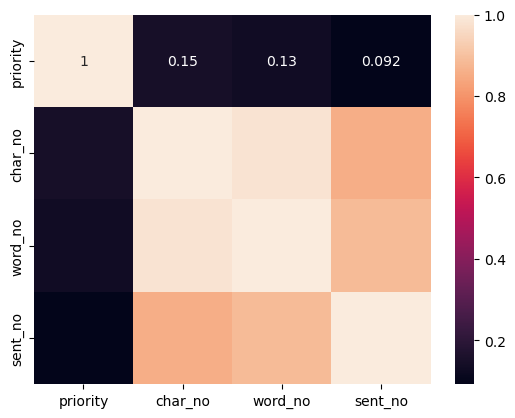

In [32]:
sns.heatmap(numeric_df.corr(), annot=True)

##### tells that relation betn chars, words and sentences is multi collinear

### Stage 3: Text Data Preprocessing
* Removing Unneccesary Characters like '\n'
* Lower Case
* Tokenisation
* Remove Special Characters
* REmove Stop Words
* Stemming

In [33]:
df['body'][0]

'Dear John, please find attached the quarterly financial report for review.'

In [34]:
# removing the '\n' from the msg body
df['body'] = df['body'].str.replace('\n', '', regex=False)
print('Removed backslash n from the messages')

Removed backslash n from the messages


In [35]:
# downloading and importing the stop words 
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bahad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
# stemming the words and create an object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print('Loaded the PorterStemmer')

Loaded the PorterStemmer


In [37]:
# function to take 5 further steps:
def text_transform(text):
#     to lowecase
    text = text.lower()
#     cut the sentences in words
    text = nltk.word_tokenize(text)
#     make a list and append only the apla-numeric characters in it(REMOVES THE SPECIAL CHARS)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
#     clone the list back in text
    text = y[:]
    y.clear()
    
#     remove stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in st.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
#     stemming the words
    for i in text:
        stemmed_word = ps.stem(i)
        y.append(stemmed_word)
        
#       return 'y' list in the form of a string
    return " ".join(y)

print('Function Defined Successfully')

Function Defined Successfully


In [38]:
text_transform('Dear John, please find attached the quarterly financial report for review.')

'dear john pleas find attach quarterli financi report review'

In [39]:
# preprocessing the texts in body
df['transformed_text'] = df['body'].apply(text_transform)
print('A new column created for Transformed Text')

A new column created for Transformed Text


In [40]:
df.head()

,body,priority,char_no,word_no,sent_no,transformed_text
0,"Dear John, please find attached the quarterly ...",0,74,13,1,dear john pleas find attach quarterli financi ...
1,Congratulations! You've won a free trip to the...,1,87,19,3,congratul free trip bahama click claim prize
2,"Hi, I am having trouble with my account login....",0,69,16,2,hi troubl account login pleas assist
3,Please join us in welcoming our new team membe...,1,77,17,1,pleas join us welcom new team member sarah hr ...
4,Urgent: Your bank account has been compromised...,0,80,14,2,urgent bank account compromis verifi detail im...


### Creating A word Cloud for every class

In [41]:
# import worlcloud and create an object
from wordcloud import WordCloud
wc = WordCloud(width=400, height=400, min_font_size=10, background_color='white')
print('WordCloud Imported')

WordCloud Imported


Class 0 WordCloud Genereated


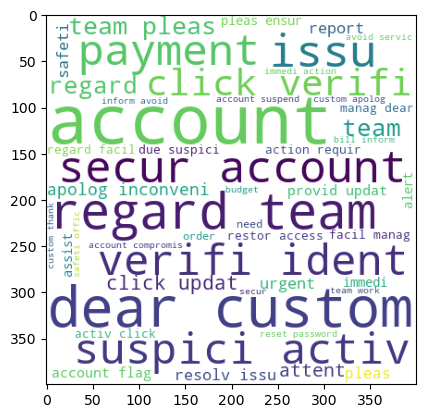

In [42]:
# wordcloud for priority 0
aca_wc = wc.generate(df[df['priority'] == 0]['transformed_text'].str.cat(sep=' '))
print("Class 0 WordCloud Genereated")
plt.imshow(aca_wc)

Class 1 WordCloud Genereated


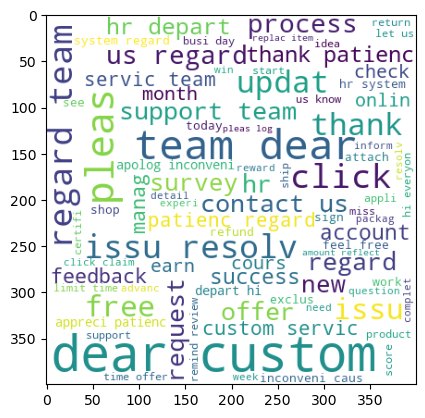

In [43]:
# wordcloud for priority 1
fin_wc = wc.generate(df[df['priority'] == 1]['transformed_text'].str.cat(sep=' '))
print("Class 1 WordCloud Genereated")
plt.imshow(fin_wc)

Class 1 WordCloud Genereated


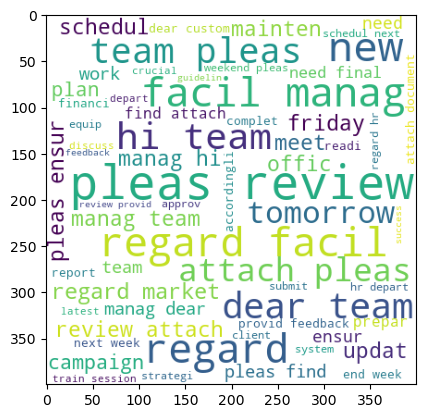

In [44]:
# wordcloud for priority 2
fin_wc = wc.generate(df[df['priority'] == 2]['transformed_text'].str.cat(sep=' '))
print("Class 1 WordCloud Genereated")
plt.imshow(fin_wc)

# Pluck out the most used words used in a one type of the class

In [45]:
#importing the collections library 
from collections import Counter
print('Collections Counter imported Successfully')

Collections Counter imported Successfully


#### Class 0: most Words

In [46]:
# plucking out used words from class 0
class_0 = [] #empty list
for msg in df[df['priority'] == 0]['transformed_text'].to_list():
    for words in msg.split():
        class_0.append(words)
        
print('Words spiltted, and added to a list')

Words spiltted, and added to a list


In [47]:
# creating a dataframe for most common words of class 0
class_0_df = pd.DataFrame(Counter(class_0).most_common(10))
print("Created a Dataframe for Class 0 common words")

Created a Dataframe for Class 0 common words


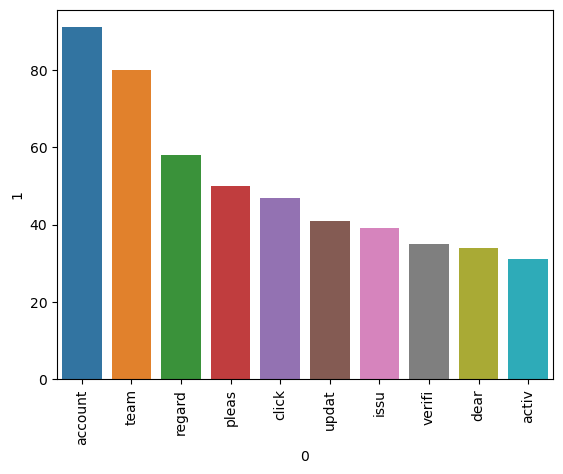

In [48]:
# plotting a bar graph to see the top 10 words of class 0
sns.barplot(x=class_0_df.columns[0], y=class_0_df.columns[1], data=class_0_df)
plt.xticks(rotation='vertical')
plt.show()

#### Class 1: most words

In [49]:
# plucking out used words in CLass 1
class_1 = [] # empty list
for msg in df[df['priority']==1]['transformed_text'].to_list():
    for words in msg.split():
        class_1.append(words)
print('Words Splited, and added to a list')

Words Splited, and added to a list


In [50]:
# creating a dataframe for most used words in class 1
class_1_df = pd.DataFrame(Counter(class_1).most_common(10))
print("Created a DAtaframe for most used words of Class 2")

Created a DAtaframe for most used words of Class 2


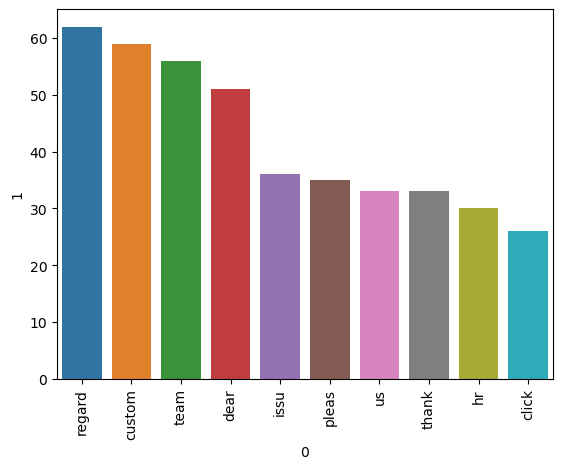

In [51]:
# plotting a barplot for most used words
sns.barplot(x=class_1_df[0], y = class_1_df[1], data=class_1_df)
plt.xticks(rotation='vertical')
plt.show()

Words Splited, and added to a list
Created a DAtaframe for most used words of Class 2


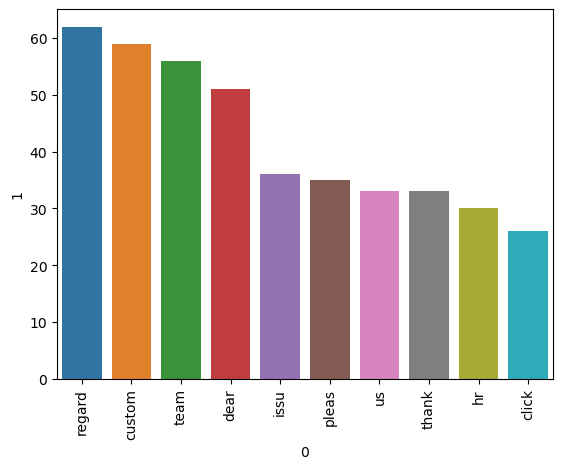

In [52]:
# creating a dataframe for words used in priority 2

# plucking out used words in priority 2
class_1 = [] # empty list
for msg in df[df['priority']==1]['transformed_text'].to_list():
    for words in msg.split():
        class_1.append(words)
print('Words Splited, and added to a list')

# creating a dataframe for most used words in class 1
class_1_df = pd.DataFrame(Counter(class_1).most_common(10))
print("Created a DAtaframe for most used words of Class 2")

# plotting a barplot for most used words
sns.barplot(x=class_1_df[0], y = class_1_df[1], data=class_1_df)
plt.xticks(rotation='vertical')
plt.show()

# Stage 4: Model Building
* Naive Bayes Algorithm(usually best for text based Classification)

In [53]:
# import the vectoriser function from Scikit learn library and creating the object
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()
print('Vectoriser Imported')

Vectoriser Imported


In [54]:
# creating a matrix that would tell whether a word is present in a text or not

# first did it using CountVectoriser
# X = cv.fit_transform(df['transformed_text']).toarray()

# now using TfidfVectoriser
X = tfidf.fit_transform(df['transformed_text']).toarray()
print('Created a sprase matrix of transformed text column and converted it to an array')

Created a sprase matrix of transformed text column and converted it to an array


In [55]:
# this matrix tells that words in a column is present in a text of which of the rows in the current dataset
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
# (r = no of entries in the dataset(total emails), c = total number of words from all the dataset)
X.shape

(629, 925)

In [57]:
# taking all the types of emails into an array
y = df['priority'].values
print(f'Classes of the emails are:  {y}')
y.shape

Classes of the emails are:  [0 1 0 1 0 2 1 1 2 0 0 1 2 0 1 0 2 0 2 1 2 2 2 0 2 0 2 1 2 1 2 1 2 2 0 1 0
 2 2 0 2 0 2 1 2 1 2 0 2 2 1 2 2 1 2 0 0 1 2 0 1 2 2 1 0 2 0 2 0 0 1 2 2 0
 2 0 0 0 2 1 2 0 2 2 1 1 2 2 2 0 2 0 2 1 2 1 2 1 2 2 0 2 1 2 2 1 0 2 1 2 1
 0 1 2 2 0 1 0 2 1 2 0 0 1 0 2 0 2 0 2 0 2 1 2 0 2 2 1 1 0 2 2 0 2 0 2 1 2
 1 2 1 2 2 0 0 1 2 2 0 1 0 2 1 2 1 0 2 2 0 2 0 2 1 0 1 2 0 2 2 0 1 0 2 2 0
 2 0 2 1 2 1 2 1 2 2 0 1 2 2 0 2 1 2 1 2 0 2 2 0 1 0 2 1 2 1 0 1 2 2 0 2 0
 2 1 2 1 2 0 2 2 0 1 0 2 2 0 2 0 2 1 2 1 2 1 2 2 1 0 1 2 2 0 2 1 2 1 0 2 2
 2 1 2 0 1 2 0 0 2 2 1 0 2 2 1 0 2 2 1 1 2 1 1 2 2 2 0 0 1 2 1 0 2 2 0 2 1
 2 2 1 0 2 1 2 0 1 2 0 0 2 1 2 2 1 0 2 2 1 1 2 2 0 2 2 2 1 2 0 2 2 1 0 2 2
 1 1 1 2 2 2 1 2 1 1 0 2 2 1 0 2 2 1 2 2 2 1 0 1 2 2 1 0 2 0 1 2 2 1 0 2 1
 1 2 2 2 0 2 2 1 0 2 2 1 0 2 2 1 1 2 2 1 0 2 2 1 0 2 2 1 0 2 2 2 2 0 1 0 2
 2 0 1 2 0 2 2 0 1 2 2 2 2 0 2 2 2 0 1 0 0 0 2 0 2 0 0 1 2 0 0 2 0 2 2 2 2
 0 1 2 1 2 0 0 2 0 2 0 0 0 2 0 1 2 2 2 2 2 0 1 2 0 1 0 1 2 0 2 0 1 2 2 1

(629,)

### Training the Model (Naive Bayes ALgorithm)

##### Requiring the Library

In [58]:
# importing the library for training
from sklearn.model_selection import train_test_split
print('Training Library imported')

Training Library imported


In [59]:
# requiring the different types of Naive Bayes Algorithms and creating their objects
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
print('Libraries Imported and Objects Created')

Libraries Imported and Objects Created


In [60]:
# importing metrics library
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print('Imported Metric libraries')

Imported Metric libraries


##### Splitting

In [61]:
# spliting the content using train_test_split, test size is 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print('Splitting of the Contents DONE')

Splitting of the Contents DONE


##### Training : GNB

In [62]:
# training the model using GNB
gnb.fit(X_train, y_train)

# predict
y_pred1 = gnb.predict(X_test)

# print the scores
print('Accuracy: ', accuracy_score(y_test, y_pred1))
print('CF: \n', confusion_matrix(y_test, y_pred1))
print('Precision: ', precision_score(y_test, y_pred1, average='weighted', zero_division=0))

Accuracy:  0.8174603174603174
CF: 
 [[31  2  5]
 [ 6 17  1]
 [ 3  6 55]]
Precision:  0.8212295081967214


##### Training : MNB

In [63]:
# training using MNB
mnb.fit(X_train, y_train)

# predicting
y_pred2 = mnb.predict(X_test)

# metrics
print('Accuracy: ', accuracy_score(y_test, y_pred2))
print('CF: \n', confusion_matrix(y_test, y_pred2))
print('Precision: ', precision_score(y_test, y_pred2, average='weighted', zero_division=0))

Accuracy:  0.8650793650793651
CF: 
 [[28  2  8]
 [ 2 21  1]
 [ 0  4 60]]
Precision:  0.8713135495744192


##### Training : BNB

In [64]:
# training using BNB
bnb.fit(X_train, y_train)

# predicting
y_pred3 = bnb.predict(X_test)

# metrics
print('Accuracy: ', accuracy_score(y_test, y_pred3))
print('CF: \n', confusion_matrix(y_test, y_pred3))
print('Precision: ', precision_score(y_test, y_pred3, average='weighted', zero_division=0))

Accuracy:  0.8333333333333334
CF: 
 [[27  4  7]
 [ 3 20  1]
 [ 1  5 58]]
Precision:  0.8404041474119337


##### So far CountVectoriser gave the best Score by BernoulliNB
##### and TfidfVectoriser gave best Score by MultimonialNB

### Hence we go with TfidfVectoriser -> MNB

### Compare with other models first

In [66]:
# imporing the models(classifiers) to compare our model 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
print('Imported the Models')

Imported the Models


In [67]:
# creating the object of the classifiers

bnb = BernoulliNB()
mnb = MultinomialNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0)
print('Objects of the models(Classifiers) created')

Objects of the models(Classifiers) created


In [68]:
# create a dictionary for key and object name pair 

clf_dict = {
    'BNB' : bnb,
    'MNB' : mnb,
    'RF' : rf,
    'KNN' : knn,
    'SVC' : svc
}
print('Created a Dictionary of Model Names and Objects')

Created a Dictionary of Model Names and Objects


In [69]:
# create a function to train the models one by one
def train_clf(clf, X_train,X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return acc, pre

print('Created a function to train a Speccific Classfier')

Created a function to train a Speccific Classfier


In [70]:
# training the classifier using the func
train_clf(knn, X_train,X_test, y_train, y_test)

(0.873015873015873, 0.8972769042559671)

In [71]:
# storing all acc and pre scores
acc_score = []
pre_score = []

# running a loop over the dictionary to get the scores for all the classfiers
for name, clf in clf_dict.items():
    
    curr_acc, curr_pre = train_clf(clf, X_train, X_test, y_train, y_test)
    
    print('For ', name)
    print('Accuracy', curr_acc)
    print('Precision', curr_pre)
    
    acc_score.append(curr_acc)
    pre_score.append(curr_pre)
    
print("DONE")

For  BNB
Accuracy 0.8333333333333334
Precision 0.8404041474119337
For  MNB
Accuracy 0.8650793650793651
Precision 0.8713135495744192
For  RF
Accuracy 0.8571428571428571
Precision 0.8604822621216064
For  KNN
Accuracy 0.873015873015873
Precision 0.8972769042559671
For  SVC
Accuracy 0.8809523809523809
Precision 0.8831275021751211
DONE


In [72]:
# create a datafram for this
perform_df = pd.DataFrame({'Algorithm':clf_dict.keys(), 'Accuracy':acc_score, 'Precision':pre_score}).sort_values('Precision', ascending=False)
perform_df

,Algorithm,Accuracy,Precision
3,KNN,0.873016,0.897277
4,SVC,0.880952,0.883128
1,MNB,0.865079,0.871314
2,RF,0.857143,0.860482
0,BNB,0.833333,0.840404


#### Training KNN

In [73]:
# we get the best result using TFIDF -> KNN model for priority hence we go with that
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
print('Imported KNN model')

# training
knn.fit(X_train, y_train)
y_pred4 = knn.predict(X_test)

# evaulating metrics
print('Accuracy: ', accuracy_score(y_test, y_pred4))
print('Precision: ', precision_score(y_test, y_pred4, average='weighted', zero_division=0))
print('CF: ', confusion_matrix(y_test, y_pred4))

Imported KNN model
Accuracy:  0.873015873015873
Precision:  0.8972769042559671
CF:  [[31  6  1]
 [ 1 22  1]
 [ 1  6 57]]


In [74]:
# import pickle library to save vectorizer and model
import pickle

# Open files in write-binary mode and dump the objects
with open('vectoriser_priority.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

with open('model_priority.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)

print('Vectorizer and Model PICKLE files created')


Vectorizer and Model PICKLE files created
